#Wrangle and Analyse data :     
## Project Topic : Dog rates Data Analysis
###Project Outline : Access data from various sources, including Tweepy, twitter API, Assessing and Visualisation of Data.

###Questions Posed Prior to Data Analysis :    
  * In which language most of tweets are written?
  * What is the most common names, people give their dogs?
  * Considering, accumulated data, Which dogtype has the highest presence in the data set? (Doggo/Floofer/Pupper/Puppo)
  * Given the complete data set, What is the avg. ratio of Favorite Count to Retweet Counts?
  * Visua;lise and asses the difference in values of these two columns.



## Lets Begin :     
  * Importing all required libraries and creating Dataframes for further Analysis.
  * Taking First Glance of given datafram.

In [233]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/Utkarsh doc/twitter-archive-enhanced.csv')
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Programatically accessing and storing provided .tsv file.


In [234]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [235]:
dfimage = pd.read_csv('/content/image_predictions.tsv', sep='\t')
dfimage.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [237]:
dfimage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [238]:
df.drop(['in_reply_to_status_id','source', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','text'], axis = 1, inplace = True)
df.head(1)


,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None


In [239]:
dfimage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [240]:
#creating new df by merging these two dataframes on tweet id 
newdf = pd.merge(df, dfimage, on="tweet_id")
newdf.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [241]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   int64  
 1   timestamp           2075 non-null   object 
 2   rating_numerator    2075 non-null   int64  
 3   rating_denominator  2075 non-null   int64  
 4   name                2075 non-null   object 
 5   doggo               2075 non-null   object 
 6   floofer             2075 non-null   object 
 7   pupper              2075 non-null   object 
 8   puppo               2075 non-null   object 
 9   jpg_url             2075 non-null   object 
 10  img_num             2075 non-null   int64  
 11  p1                  2075 non-null   object 
 12  p1_conf             2075 non-null   float64
 13  p1_dog              2075 non-null   bool   
 14  p2                  2075 non-null   object 
 15  p2_conf             2075 non-null   float64
 16  p2_dog

In [242]:
#checking for duplicate elements in new df.
sum(newdf.duplicated())

0

In [243]:
#checking for NULL / NAN values in the complete dataset.
newdf.isnull().sum()

tweet_id              0
timestamp             0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
dtype: int64

###Cleaning Complete.

###Merging all Dog Types into a common category.
Dog Type = Doggo + Floofer + Pupper + Puppo.

In [244]:
newdf['dogtype']= newdf['doggo'] + newdf['floofer'] + newdf['pupper'] + newdf['puppo']


In [245]:
newdf.head(1)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtype
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NoneNoneNoneNone


### Cleaning this new column formed.

In [246]:
count = 0
for i,r in enumerate(newdf.dogtype):
    
    if r == "NoneNoneNoneNone":
      count = count+1
print(count) 


1754


In [247]:
for i,r in enumerate(newdf.dogtype):
    
    if r == "NoneNoneNoneNone":
      newdf.dogtype[i]= "undefined"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [248]:
newdf.head(1)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtype
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,undefined


In [249]:
for i,r in enumerate(newdf['dogtype']):
  if 'None' in r:
    newdf.dogtype[i] = newdf.dogtype[i].replace('None', '')
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [250]:
newdf.head(1)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtype
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,undefined


### Generating Visualisations on 'Dogtype'
Following Visualisation, we can also find exact number of dogs, falling into each category

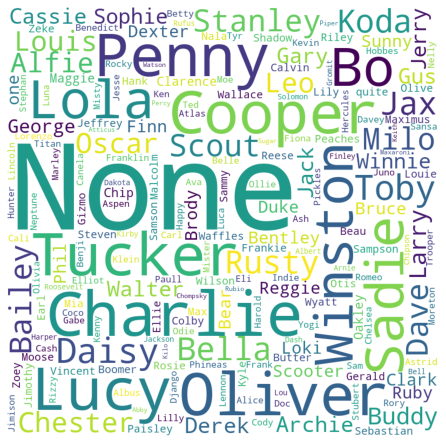

In [251]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(newdf['name']))
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

here we can say bigger percentage of our dog names have 'None' , so we drop it from our word cloud, giving us a better view of names in word cloud.

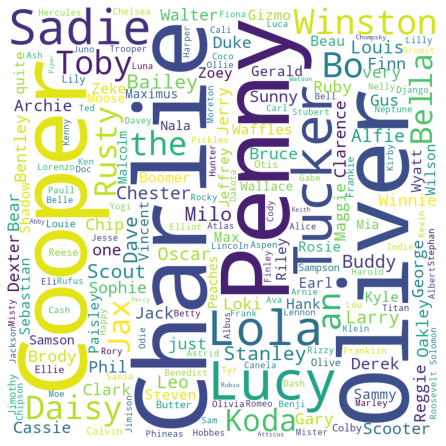

In [252]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = ['None'],
                min_font_size = 10).generate(' '.join(newdf['name']))
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

###Here we go, 
I see Charlie, Oliver, Cooper, Penny and Lucy are few of the most common names given in our dataframe.
(rest all other names are present in word cloud that have less frequency.)

In [253]:
newdf.groupby('dogtype').count()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
dogtype,,,,,,,,,,,,,,,,,,,,
doggo,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
doggofloofer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
doggopupper,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
doggopuppo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
floofer,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
pupper,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211
puppo,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
undefined,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754


### Accessing data from gathered tweepy json file and storing into dataframe 'dftweet'

In [254]:
dftweet = pd.read_json('/content/drive/MyDrive/Utkarsh doc/tweet.json', lines=True)
dftweet.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [255]:
dftweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Cleaning and Engineering newly acquired dataframe : 'dftweet'

In [256]:
#id column of new data has different name, so we rename it to 'tweet_id'
dftweet.rename(columns = {'id':'tweet_id'}, inplace = True)
dftweet.drop(['id_str','full_text','truncated','display_text_range','place','contributors','entities','extended_entities','source','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','user','geo','coordinates','is_quote_status','favorited','retweeted','possibly_sensitive_appealable','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status'], axis=1 , inplace=True)

### merging previous engineered df 'newdf' with 'dftweet' on 'tweet_id' for better approach and accessebility

In [257]:
newdf = pd.merge(newdf, dftweet, on="tweet_id")
newdf.head(1)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtype,created_at,retweet_count,favorite_count,possibly_sensitive,lang
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,undefined,2017-08-01 16:23:56+00:00,8853,39467,0.0,en


### plotting histogram to find frequency of languages of the tweets

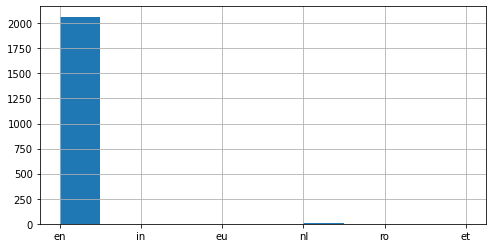

In [258]:
plt.figure(figsize = (8,4), facecolor = None)
newdf['lang'].hist()

### Conclusion
From above histogram plot we can clearly infer that, majority of our tweets (close to 99%) are in 'en', which stands for 'English' language.

In [259]:
newdf['rating_numerator'].mean()

12.26579835986493

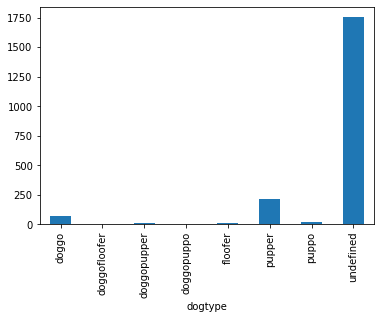

In [260]:
newdf.groupby(['dogtype']).size().plot(kind = "bar")

It is clear, major percent of our dogs do not have any defined dog type. So performing calculations on this factor can easily affect the dignity of our datafrae. Hence I have created a separated df of dogtypes with legit values : 

In [261]:
a = newdf.loc[newdf['dogtype'] !="undefined"]
a.head(1)


,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogtype,created_at,retweet_count,favorite_count,possibly_sensitive,lang
9,890240255349198849,2017-07-26 15:59:51 +0000,14,10,Cassie,doggo,None,None,None,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,2017-07-26 15:59:51+00:00,7711,32467,0.0,en


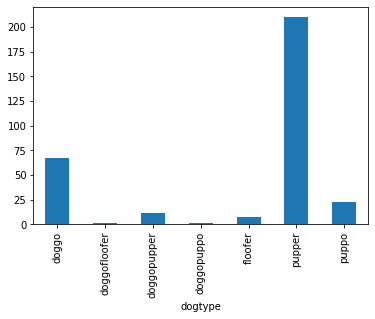

In [262]:
a.groupby(['dogtype']).size().plot(kind = "bar")

### Concluding from bar chart above:
* Most of dogs with defined type are : 'pupper'.
* Followed by : 'doggo' and 'puppo'

In [263]:
rmean = newdf['retweet_count'].mean()
fmean = newdf['favorite_count'].mean()
print (rmean,fmean,fmean/rmean)

2976.0892426435116 8556.718282682103 2.875155139864555


### Mean and Ratio of Favorite Counts to that of Retweet Counts. :      
  * Mean Retweet Count = 2976.089(approz)
  * Mean Favorite Count = 8556.71(approz)

### Ratio of Mean Favorite Count to Retweet count = **2.87** (approx)
This indicates user tendency of adding tweets more to their **Favorite** than **Retweeting** a tweet.

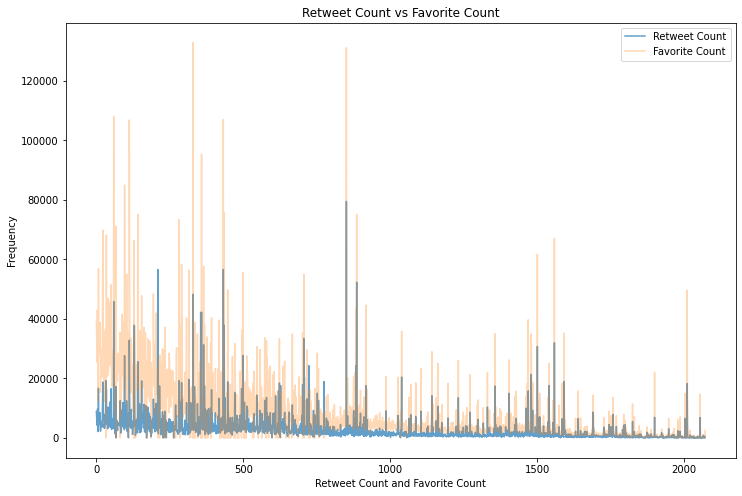

In [265]:
plt.figure(figsize = (12,8), facecolor= None)
plt.plot(newdf['retweet_count'],alpha=0.7)
plt.plot(newdf['favorite_count'],alpha=0.3)
plt.xlabel("Retweet Count and Favorite Count")
plt.ylabel("Frequency")
plt.title ("Retweet Count vs Favorite Count")
plt.legend(['Retweet Count', 'Favorite Count'])

### Infering from line graph above:
We can clearly understand the trends followed by these two entities:
* People tend more to add a tweet to their favorites than retweeting a tweet.
* Mean of Favorite Count > Retweet Count.
* Max value of Favorite Count > Retweet Count.

# Analysis Conclusion :     
  * Charlie, Oliver, Cooper, Penny and Lucy are few of the most common names given to dogs in our dataframe.
  * We can clearly infer that, majority of our tweets (close to 99%) are in 'en', which stands for 'English' language.
  * Most of dogs with defined type are : 'pupper'. Followed by : 'doggo' and 'puppo'
  * Now Finally after analysing required last two columns : Favorite Count and Retweet Count we Clear find the following observations:
    * Favorite Count has higher Maximum Value, close to 15000(approx), while Retweet count remains maxed out at 7800 (approx)
    * People tend to add a tweet to their favorite than retweeting a certain tweet.
    * Mean value of Favorite Count > Retweet Count. ('**2976.0892426435116**' and '**8556.718282682103**' respectively)
    * Ratio shared between these two entities (Favorite Count : Retweet Count) = 2.875155139864555 : 1 .


## Data Quality issues found during Analysis.
  * Data provided by Tweepy API had redundent data, ie; most of its columns has None or NAN values stored and needed to be cleaned before analysis.
  * Data provided regarding DogType is inediquate as most of tweets do not have type mentioned instead, have 'None' values filled.
  * Unnecessary/ Irrelevant data provided in form various columns such as : ['id_str','full_text','truncated','display_text_range','place','contributors','entities','extended_entities'...... etc, which had to be dropped.
  * English being major language of almost all the tweets provided(99%), lang column could not be used for analysis purposes.
  * Column Possible Senstivity has '0.0' as common value for every row through out data frame, defying its relevance in dataframe.

### Concluding Statement : The conclusions provided do not showcase the complete scenario, as due to reasons such as unavailability of data, we here may have infered biased resuls.